In [177]:
# Require packages
import numpy as np
%matplotlib inline
import pandas as pd

In [178]:
# Load datasets
head = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
        'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
        'hours_per_week', 'native_country', 'income']

dataMain = pd.read_csv("./adult_data/adult-data.csv", names=head, index_col=False)
dataTest = pd.read_csv("./adult_data/adult-test.csv", names=head, index_col=False)

In [179]:
# combine datasets
df = pd.concat([dataMain, dataTest])

# print the first few rows of the main dataset
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [180]:
# main dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


### Description of the dataset
The dataset contains demographic information and information about income from 48842 individuals before 1996.
The data was initially extracted from the US american census bureau on http://www.census.gov/ftp/pub/DES/www/welcome.html, but downloaded by the student from http://archive.ics.uci.edu/ml/datasets/Adult.

#### The dataset has 14 features:
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

#### The label (dependent feature) for this dataset is:
- income: >50K, <=50K.

The dataset is initially provided with a train-test-split in two separate files.
For simplicity in data cleaning and column transformations the data set is combined and train-test-split
performed manually.

### Data Cleaning
From observation and the description file delivered with the dataset, it becomes apparent that there
has to be some minor data cleaning done:

- there are duplicate or conflicting values according to <code>adult-names.txt</code> (file attached to the datasets)
- some values are saved with trailing spaces or a trailing <code>.</code>
- there are observations with unknow values: <code>?</code>

It is also unclear, why the <code>capital_gain</code> and <code>capital_loss</code> columns are separated, which is why they could potentially be combined into one metric by calculating <code>capital_pl = capital_gain - capoital_loss</code>.

In [181]:
# function for cleaning the dataframes
def cleanDataframe(df):
    cleanDf = pd.DataFrame()
    
    for series in df:
        # select only string columns for cleaning
        if df[series].dtype == object:
            # strip whitespace, inset NaN, strip trailing dot
            cleanDf[series] = df[series].str.strip().replace('?', np.nan).str.rstrip('.')
        else:
            cleanDf[series] = df[series]
    
    # drop duplicates
    cleanDf.drop_duplicates(inplace=True)
    
    # drop rows with NaN entries
    cleanDf.dropna(inplace=True)
    
    # reset row index
    cleanDf.reset_index(drop=True, inplace=True)
    
    return cleanDf

In [182]:
# apply data cleaning function
df = cleanDataframe(df)

# join capital_gain, capital_loss columns to capital_pl
capital_pl = df['capital_gain'].values - df['capital_loss'].values
df.insert(10, 'capital_pl', capital_pl)
df.drop(['capital_gain', 'capital_loss'], axis=1, inplace=True)

## Column selection and dummy columns
I decided to use the following features for analysis:

- age: continuous
- workclass: get_dummies
- education_num: ordinal data
- marital_status: get_dummies
- race: get_dummies
- sex: map(0=male, 1=female)
- capital_pl: continuous
- hours_per_week: continuous

Label:
- income: map("<=50K"=0, ">50K"=1)

In [184]:
# drop unused tables
df.drop(["fnlwgt", 'education', 'occupation', 'relationship', 'native_country'], inplace = True, axis = 1)

# get dummy columns for:

# workclass:
workclass = pd.get_dummies(df["workclass"], prefix = "workclass", drop_first = True)
df.drop("workclass", inplace = True, axis = 1)
df = pd.concat([workclass, df], axis = 1)

# marital_status:
marital_status = pd.get_dummies(df["marital_status"], prefix = "marital_status", drop_first = True)
df.drop("marital_status", inplace = True, axis = 1)
df = pd.concat([marital_status, df], axis = 1)

# race:
race = pd.get_dummies(df["race"], prefix = "race", drop_first = True)
df.drop("race", inplace = True, axis = 1)
df = pd.concat([race, df], axis = 1)

# map columns for:

# sex
df["sex"] = df.sex.map({"Female": 0, "Male": 1})

# income
df["income"] = df.income.map({"<=50K": 0, ">50K": 1})

df.head()

,race_Asian-Pac-Islander,race_Black,race_Other,race_White,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed,...,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,age,education_num,sex,capital_pl,hours_per_week,income
0,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,39,13,1,2174,40,0
1,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,50,13,1,0,13,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,38,9,1,0,40,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,53,7,1,0,40,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,28,13,0,0,40,0


## Question 1: Grid search, KNN, SVM and Ensembles

a.) Using grid search and your selected metric, find the best hyperparameters for two models: SVM and KNN. Briefly describe how you selected the hyperparameters and their values for grid search.
    
b.) Combine the SVM, KNN with the best parameters, and a decision tree model with default parameters, into a voting classifier. Evaluate its performance.

c.) Train a random forest model and evaluate its performance.

<b>NOTE: Grid search was limited to 3x3 parameters for each model, as computing time got extremely long!
The consequence of that is, that there could potentially be a better combination of params to be found out with more computations.</b>

### Support vector machine (SVM)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [185]:
# select features
features = []

# loop all columns onto the features array
for series in df:
    features.append(series)

# remove the label column "income"
features.pop()

X = df[features]
y = df.income

# scaling the data

# scaling is an important step here, as categorical data was transformed to binary
# and would skew the feature importances as compared to the continuous features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [186]:
# list features
features

['race_Asian-Pac-Islander',
 'race_Black',
 'race_Other',
 'race_White',
 'marital_status_Married-AF-spouse',
 'marital_status_Married-civ-spouse',
 'marital_status_Married-spouse-absent',
 'marital_status_Never-married',
 'marital_status_Separated',
 'marital_status_Widowed',
 'workclass_Local-gov',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'age',
 'education_num',
 'sex',
 'capital_pl',
 'hours_per_week']

In [209]:
# feature values after scaling
X[0]

array([-0.17220075, -0.3212919 , -0.08874456,  0.40315797, -0.0266244 ,
       -0.93376556, -0.11122186,  1.44954738, -0.1795581 , -0.17055839,
       -0.27143684, -1.67095059, -0.19439658, -0.30283819,  4.71320334,
       -0.0215656 ,  0.03358477,  1.12892314,  0.69382303,  0.15398187,
       -0.07849301])

In [188]:
#train and test split
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, random_state = 1)
len(xTrain),len(xTest)

(33881, 11294)

In [189]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

# train svm classifiers / parameters are kept default
clf = SVC(gamma = 'auto')
clf.fit(xTrain, yTrain)
yPred = clf.predict(xTest)

# f1 score is for model performance
f1_score(yTest, yPred)

0.6225713104588673

In [190]:
from sklearn.model_selection import GridSearchCV
# docs: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

# model
svc = SVC(kernel = 'rbf')

# parameters for grid search
params = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}

# grid search
gridClf = GridSearchCV(svc, params, cv = 4, scoring = "f1")
gridClf.fit(xTrain, yTrain)

GridSearchCV(cv=4, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [191]:
# Entire grid results (optional)
list(zip(gridClf.cv_results_["mean_test_score"], gridClf.cv_results_["params"]))

[(0.5935462743901962, {'C': 0.1, 'gamma': 0.1}),
 (0.5139720861288481, {'C': 0.1, 'gamma': 1}),
 (0.1913406266863226, {'C': 0.1, 'gamma': 10}),
 (0.6244779277790913, {'C': 1, 'gamma': 0.1}),
 (0.6176805743237634, {'C': 1, 'gamma': 1}),
 (0.49007711525329334, {'C': 1, 'gamma': 10}),
 (0.6310346728568567, {'C': 10, 'gamma': 0.1}),
 (0.6170153523017807, {'C': 10, 'gamma': 1}),
 (0.4998201951537892, {'C': 10, 'gamma': 10})]

In [193]:
# SVM results
print(gridClf.best_score_, gridClf.best_params_)

0.6310346728568567 {'C': 10, 'gamma': 0.1}


#### Parameters
- <code>C=10</code>
- <code>gamma=0.1</code>

### K-nearest-neighbors (KNN)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [195]:
from sklearn.neighbors import KNeighborsClassifier
pd.options.mode.chained_assignment = None  # for better Pandas behavior

# scaling the data for KNN

# data was already scaled for SVM, so no scaling a second time!

In [196]:
from sklearn.neighbors import KNeighborsClassifier

# model
clf2 = KNeighborsClassifier()


# grid search for best KNN parameters

# parameters
params2 = { 'n_neighbors': [1, 5, 10], 'weights': ['uniform', 'distance'], 'leaf_size':[10, 20, 30] }

# grid search
gridClf2 = GridSearchCV(clf2, params2, scoring = "f1")
gridClf2.fit(xTrain,yTrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [10, 20, 30], 'n_neighbors': [1, 5, 10],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [197]:
# KNN results
print(gridClf2.best_score_, gridClf2.best_params_)

0.6083175344579447 {'leaf_size': 20, 'n_neighbors': 5, 'weights': 'uniform'}


#### Parameters
- <code>leaf_size=20</code>
- <code>n_neighbors=5</code>
- <code>weights='uniform'</code>

### Decision Tree

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### Voting classifier

In [198]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

svc = SVC(kernel='rbf', C=10, gamma=0.1)
knn = KNeighborsClassifier(leaf_size=20, n_neighbors=5, weights='uniform')
tree = DecisionTreeClassifier(random_state = 1)

# creating ensemble
vc = VotingClassifier(estimators = [('svc', svc), ('knn', knn), ('tree', tree)], 
                      voting = "hard")

vc.fit(X,y)

VotingClassifier(estimators=[('svc',
                              SVC(C=10, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma=0.1, kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False)),
                             ('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=20,
                                                   metric='minkowski',
                                                   metric_params=Non...
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
   

In [199]:
# performance measure

yPred = vc.predict(xTest)
f1_score(yTest, yPred)

0.7657460758990663

In [200]:
from sklearn.metrics import confusion_matrix

confusion_matrix(yTest, yPred)

array([[8188,  301],
       [ 878, 1927]])

### Random forest classifier

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [201]:
from sklearn.ensemble import RandomForestClassifier

# test best parameters for random forest model
# Your code here
bestScore = { 'params': [], 'score': 0 }
for depth in [2, 4, 6, 8, 10]:
  for est in [2, 5, 8, 12, 15, 20]:
    for boo in [True, False]:
      f1 = f1_score(yTest,
        RandomForestClassifier(max_depth = depth, n_estimators = est, bootstrap = boo, 
                              random_state = 1)
          .fit(xTrain, yTrain)
          .predict(xTest))
      if f1 > bestScore['score']:
        bestScore['params'] = [depth, est, boo]
        bestScore['score'] = f1

In [202]:
# print the best score
bestScore

{'params': [10, 20, False], 'score': 0.6528977871443625}

In [203]:
# build the model with optimal params
rf = RandomForestClassifier(max_depth = 10, n_estimators = 20, bootstrap = False, random_state = 1)
rf.fit(xTrain, yTrain)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [205]:
# evaluate performance
yPredRf = rf.predict(xTest)
f1_score(yTest, yPredRf)

0.6528977871443625

In [206]:
# confusion matrix
confusion_matrix(yTest, yPredRf)

array([[8098,  391],
       [1256, 1549]])

In [208]:
# measuring feature importances
featureImportances = list(zip(features, rf.feature_importances_))
list(sorted(featureImportances, key = lambda x: x[1], reverse = True))

[('marital_status_Married-civ-spouse', 0.2699739137139782),
 ('capital_pl', 0.2319179964246632),
 ('education_num', 0.20953572344162535),
 ('marital_status_Never-married', 0.08877081153282643),
 ('hours_per_week', 0.08157853556655172),
 ('age', 0.06417597374484649),
 ('sex', 0.018687834286830206),
 ('workclass_Self-emp-inc', 0.007818464310762042),
 ('workclass_Self-emp-not-inc', 0.007069476700487675),
 ('workclass_Private', 0.005987015148884932),
 ('marital_status_Separated', 0.0029634058865359732),
 ('race_Black', 0.002287532939683499),
 ('race_White', 0.0022083908399673736),
 ('marital_status_Widowed', 0.0017121325228156834),
 ('workclass_Local-gov', 0.0012378054728748467),
 ('race_Asian-Pac-Islander', 0.001145909930071772),
 ('workclass_State-gov', 0.0009769262977441955),
 ('marital_status_Married-spouse-absent', 0.0008497788327113707),
 ('race_Other', 0.0006035042390194366),
 ('marital_status_Married-AF-spouse', 0.0003999710395890042),
 ('workclass_Without-pay', 9.889712753059519e-

### Feature importances
By far the most important feature is workclass: subjects 'Without-pay' are obviously a good predictor for income

## Question 3: PCA

a.) Suppose you perform PCA on a 1,000-dimensional dataset, setting the explained variance ratio to 95%. How many dimensions will the resulting dataset have after the PCA? Take two extreme scenarios: 1) dataset almost perfectly aligned 2) dataset perfectly random sampled to answer the question.

b.) In which scenarios/conditions would you use vanilla PCA, Incremental PCA, Randomized PCA, or Kernel PCA?

### Solution:


<b>a.) Scenario 1:</b>
In the case of a almost perfectly aligned dataset, PCA will perform quite good and reduce the 1,000 dimensions asymptotically close to a single dimension, while maintaining the variance of ~95%.

<b>Scenario 2:</b>
If a dataset is perfectly randomly distributed on 1,000 dimensions, PCA will have a hard time reducing the number of dimensions without messing up the variance. Approximately 1,000 * 0,95 = 950 dimensions could be required to retain a variance of 95%, but depending on the data it could be less.


<b>b.)</b>Vanilla PCA works fine, but the whole dataset needs to be loaded into memory. This can be a problem in the case of really large datasets. Consequently, If memory is not a bottleneck, I would use vanilla PCA.
Incremental PCA can be used, when not all data fits into memory, streams of data are analyzed or the data is accumulated in an asynchronous manner. Randomized PCA can only be used when the whole dataset fits into memory, but quickly finds an approximation of the first d. Kernel PCA can be used for non-linear data.

## Question 4: PCA (Principal component analysis)

a.) Load the MNIST dataset and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.
Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next, evaluate the classifier on the test set. How does it compare to the previous classifier?

b.) Some dimensionality reduction techniques can also be used for anomaly detection. For example, take the Olivetti faces dataset and reduce it with PCA, preserving 99% of the variance. Then compute the reconstruction error for each image. Next, take some of the images you built and modify some images using techniques such as rotate, flip, darken, and look at their reconstruction error: notice how much larger the reconstruction error is. If you plot a reconstructed image, you will see why: it tries to reconstruct a normal face.

#### Solution 4A

In [61]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000]

X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:]

In [62]:
from sklearn.ensemble import RandomForestClassifier
import time

clf4 = RandomForestClassifier(n_estimators=100, random_state=1)

# save time before training model
t0 = time.time()

# train model
clf4.fit(X_train, y_train)

# save time after
t1 = time.time()

In [64]:
print(format(t1 - t0))

39.00961399078369


In [65]:
from sklearn.metrics import accuracy_score

# measure model performance
y_pred = clf4.predict(X_test)
accuracy_score(y_test, y_pred)

0.9699

In [70]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [71]:
# model
clf5 = RandomForestClassifier(n_estimators=100, random_state=1)

# save time before training model
t0 = time.time()

# train model
clf5.fit(X_train_reduced, y_train)

# save time after
t1 = time.time()

In [72]:
print(format(t1 - t0))

85.88539814949036


In [73]:
X_test_reduced = pca.transform(X_test)

y_pred = clf5.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9502

### Solution:

Training the model with the PCA fitted data took <code>85.89s</code> as compared to <code>39.01s</code> previously without PCA. Consequently, training the model after the PCA took more than twice as long. The slight loss in performance from an accuracy_score of <code>0.9699</code> to <code>0.9502</code> after PCA is expected due to the loss of dimensionality. For this dataset and training model, PCA was really counter-productive.

#### Solution 4B

The book <b>Hands-on Machine Learning with Scikit-Learn & TensorFlow</b> [Link](https://www.academia.edu/37010160/Hands-On_Machine_Learning_with_Scikit-Learn_and_TensorFlow) was of great help for the solution of this task. The author provided advice on his [GitHub](https://github.com/ageron) on how to perform the image transformations. I used part of the code for the image transformations for my solution in this notebook.

In [46]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/dominikgadesmann/scikit_learn_data


In [77]:
# train-test-split
x_Train, x_Test, y_Train, y_Test = train_test_split(olivetti.data, olivetti.target, random_state =22)
len(x_Train), len(x_Test)

(300, 100)

In [79]:
# model with 0.99% variance
pca2 = PCA(0.99, random_state = 1)

# apply pca to images
X_train_pca = pca2.fit_transform(x_Train)
X_test_pca = pca2.transform(x_Test)

pca2.n_components_

209

In [81]:
# pca inverse transformation
reconst = pca2.inverse_transform(X_train_pca)

# calculate reconstruction errors after pca
total_reconst_error = np.square(reconst - x_Train).mean(axis=-1)
print(total_reconst_error)

[6.94722985e-05 2.79314263e-04 2.70409131e-04 1.78328584e-04
 2.55660678e-04 3.54920048e-04 3.21120839e-04 5.08658486e-05
 3.05809459e-04 2.42465743e-04 1.79227471e-04 3.28826747e-04
 3.19051149e-04 5.68908363e-05 9.67928354e-05 2.71856319e-04
 1.17330004e-04 1.31743844e-04 4.66671081e-05 8.50615615e-05
 3.12200398e-04 3.44111497e-04 1.96468085e-04 2.56089435e-04
 2.57819338e-04 1.65630132e-04 1.34464863e-04 2.95303238e-04
 5.31580990e-05 4.28648527e-05 1.84538541e-04 3.58311809e-04
 2.46033393e-04 1.96581153e-04 2.55693682e-04 1.98207796e-04
 3.14894365e-04 2.75717874e-04 7.00253004e-05 1.56473048e-04
 2.79165048e-04 2.26534466e-04 2.04307784e-04 2.77966719e-05
 3.75534408e-04 2.85423710e-04 3.42768442e-04 2.96186627e-04
 5.35608051e-05 7.52460910e-05 3.37766804e-04 1.31185865e-04
 2.86231865e-04 3.05293303e-04 7.85112643e-05 1.07615851e-04
 2.49238277e-04 2.51906429e-04 2.57857115e-04 1.11832116e-04
 2.55460938e-04 3.28331109e-04 2.46485317e-04 4.96607245e-05
 3.04950663e-04 1.677139

The reconstruction error on the images is considerably small on the 4th/ 5th after comma dimension.

In [107]:
import matplotlib.pyplot as plt

# function for plotting the images
def plot_faces(faces, labels, n_cols=5):
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face.reshape(64, 64), cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

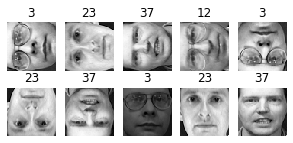

In [108]:
# mutating the images:

# rotation
n_rotated = 4
rotated = np.transpose(x_Train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_Train[:n_rotated]

# flipping
n_flipped = 3
flipped = x_Train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_Train[:n_flipped]

# darkening
n_darkened = 3
darkened = x_Train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
darkened = darkened.reshape(-1, 64*64)
y_darkened = y_Train[:n_darkened]

# resulting images
X_modified = np.r_[rotated, flipped, darkened]
y_modified = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_modified, y_modified)

In [109]:
# transforming the images back
X_modified_pca = pca2.transform(X_modified)

# pca inverse transformation
reconstModified = pca2.inverse_transform(X_modified_pca)

# calculate reconstruction errors again after modifying and pca
total_reconst_error2 = np.square(reconstModified - X_modified).mean(axis=-1)
print(total_reconst_error2)

[0.00872716 0.00498176 0.00795863 0.00578135 0.00764011 0.0038536
 0.00586883 0.00071204 0.0007156  0.00070667]


The construction errors for the images are much larger than previously.

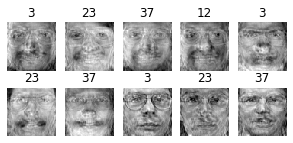

In [110]:
# plotting images after pca reconstruction
plot_faces(reconstModified, y_modified)

The reconstructed faces look brighter and very skewed.

## Question 5: Bayes rule for drug testing

Suppose let’s say a drug test produces a positive result with probability of 0.99 for the drug users, which means P(T = 1 | D = 1) = 0.99, where the event P(T = 1 | D = 1) indicates the conditional probability of drug test showing positive result on a drug user. The also produces a negative result with probability 0.96 on the non-drug users, which means P (T = 0 | D = 0) = 0.96. The probability that a random person uses drugs is 0.001, so P(D = 1) = 0.001. What is the probability that a random person who tests to be positive in the drug test, is also a drug user, which is P(D = 1 | T = 1)?

### Solution:

#### given probabilities:

P(T=1|D=1) = 0.99

=> P(T=0|D=1 = 1 - 0.99 = 0.01

P(T=0|D=0)=0.96

=> P(T=1|D=0) = 1 - 0.96 = 0.04


P(D=1) = 0.001

=> P(D=0) = 1 - 0.001 = 0.999

#### calculation:

P(D=1|T=1) = ( P(D=1) * P(T=1|D=1) ) / ( P(D=1) * P(T=1|D=1) + P(T=1|D=0) * P(D=0) )

= ( 0.001 * 0.99 ) / ( 0.001 * 0.99 + 0.04 * 0.999 )

= 0.00099 / ( 0.00099 + 0.03996)

= 0.00099 / 0.04095

= 0.02417 => 2.42%

#### answer:
The probability that a random person being tested positive for drugs, is also a drug user, is approximately <code>2.42%</code>.